# Problem 1 : Data Preparation

Download the dataset train.csv and the associated text file data_description.txt posted with this Exercise. The dataset
and description are collected from Kaggle. You may also want to download the files directly from the Kaggle Competition
(Login > Go to “Data” > “Download All”). Either way, read the competition description to get an idea about the task.

Source : Kaggle Competition : House Prices : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Import Libraries

In [412]:
import numpy as py
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #we only need pyplot
sb.set() #Set the default seaborn style for graphics

a) Import the “train.csv” data you downloaded (either from NTU Learn or Kaggle) in Jupyter Notebook.

In [413]:
houseData = pd.read_csv("train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


b) What are the data types (“dtypes”) – int64/float64/object – of the variables (columns) in the dataset?

In [414]:
print(houseData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


c) Create a new Pandas DataFrame consisting of only the variables (columns) of type Integer (int64).

In [415]:
intDF = houseData.select_dtypes("int64")
intDF.head(n=10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000


d) Open the “data_description.txt” file you downloaded (either from NTU Learn or Kaggle) in Wordpad.
Read the description for each variable carefully and try to identify the “actual” Numeric variables.
Categorical variables are often “encoded” as Numeric variables for easy representation. Spot them.


# Actual numeric values:

---

 - LotFrontage: Linear feet of street connected to property
 - LotArea: Lot size in square feet
 - YearBuilt: Original construction date
 - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
 - MasVnrArea: Masonry veneer area in square feet
 - BsmtFinSF1: Type 1 finished square feet
 - BsmtFinSF2: Type 2 finished square feet
 - BsmtUnfSF: Unfinished square feet of basement area
 - TotalBsmtSF: Total square feet of basement area
 - 1stFlrSF: First Floor square feet
 - 2ndFlrSF: Second floor square feet
 - LowQualFinSF: Low quality finished square feet (all floors)
 - GrLivArea: Above grade (ground) living area square feet
 - BsmtFullBath: Basement full bathrooms
 - BsmtHalfBath: Basement half bathrooms
 - FullBath: Full bathrooms above grade
 - HalfBath: Half baths above grade
 - Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
 - Kitchen: Kitchens above grade
 - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
 - Fireplaces: Number of fireplaces
 - GarageYrBlt: Year garage was built
 - GarageCars: Size of garage in car capacity
 - GarageArea: Size of garage in square feet
 - WoodDeckSF: Wood deck area in square feet
 - OpenPorchSF: Open porch area in square feet
 - EnclosedPorch: Enclosed porch area in square feet
 - 3SsnPorch: Three season porch area in square feet
 - ScreenPorch: Screen porch area in square feet
 - MiscVal: $Value of miscellaneous feature
 - MoSold: Month Sold (MM)
 - YrSold: Year Sold (YYYY)
 - PoolArea: Pool area in square feet
 
# Categorical numeric
---

 - MSSubClass: Identifies the type of dwelling involved in the sale.
 - OverallQual: Rates the overall material and finish of the house (1-10)
 - OverallCond: Rates the overall condition of the house (1-10)

e) Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables.

In [416]:
#Drop the three categoricals
intDF = intDF.drop(["MSSubClass","OverallQual","OverallCond"], axis='columns')
intDF

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,2003,2003,706,0,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,1976,1976,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,2001,2002,486,0,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,1915,1970,216,0,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,2000,2000,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,2000,0,0,953,953,953,694,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,13175,1978,1988,790,163,589,1542,2073,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,9042,1941,2006,275,0,877,1152,1188,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,9717,1950,1996,49,1029,0,1078,1078,0,...,366,0,112,0,0,0,0,4,2010,142125


# Problem 2 : Statistical Summary
Now that you have a “clean” DataFrame with only Numeric variables, we can safely perform standard statistics.

a) Find the Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice from the Numeric DataFrame.

In [417]:
#Get some statistics from it
#Find out data dims
print("Data dims : ", intDF.shape)

#Then find out summary stats
print("Statistical Summary:")
intDF.describe()

Data dims :  (1460, 32)
Statistical Summary:


,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


b) Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.

In [418]:
#Extract the sale price
salePriceDF = pd.DataFrame(intDF['SalePrice'])
#Describe sale price DF
salePriceDF.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


# Box Plot

Interval: 84025.0       Left Whisker:3937.5       Right Whisker:340037.5


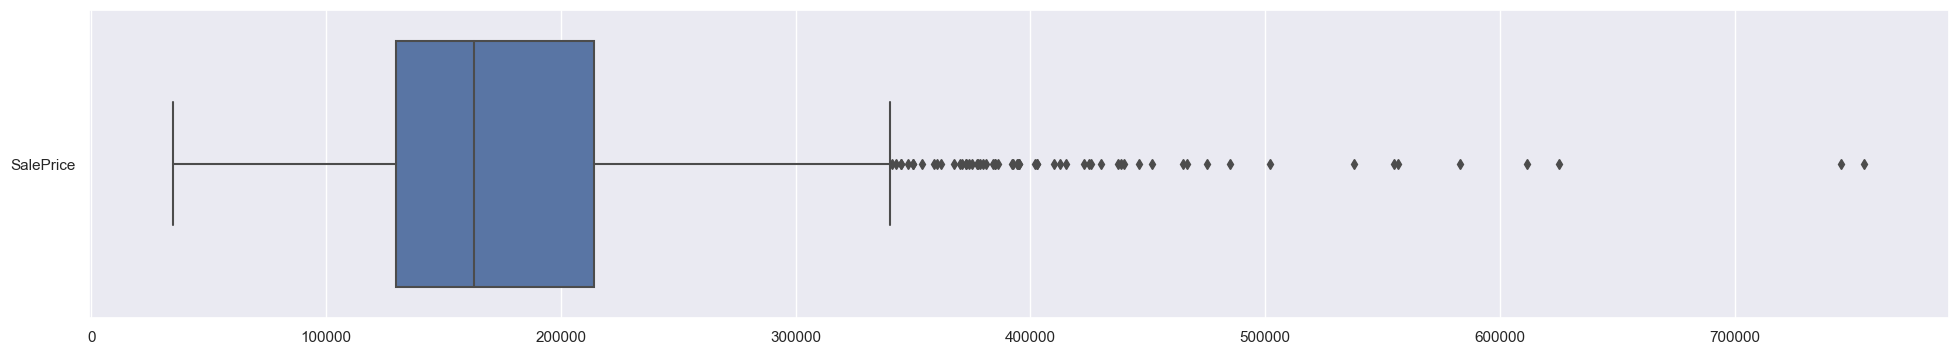

In [419]:
#Set figure
f = plt.figure(figsize = (24,4))
sb.boxplot(data = salePriceDF, orient = 'h')

#Find bottom and top whiskers
salePriceStats = salePriceDF.describe();
salePriceDiff = salePriceStats.loc['75%'] - salePriceStats.loc['25%']
#1.5 Quartile Gap
leftWhisker = salePriceStats.loc['25%'] - (1.5 * salePriceDiff)
rightWhisker = salePriceStats.loc['75%'] + (1.5 * salePriceDiff)
print("Interval: {0}\
       Left Whisker:{1}\
       Right Whisker:{2}".format(salePriceDiff.SalePrice, leftWhisker.SalePrice, rightWhisker.SalePrice))

# Histogram

<AxesSubplot:ylabel='Count'>

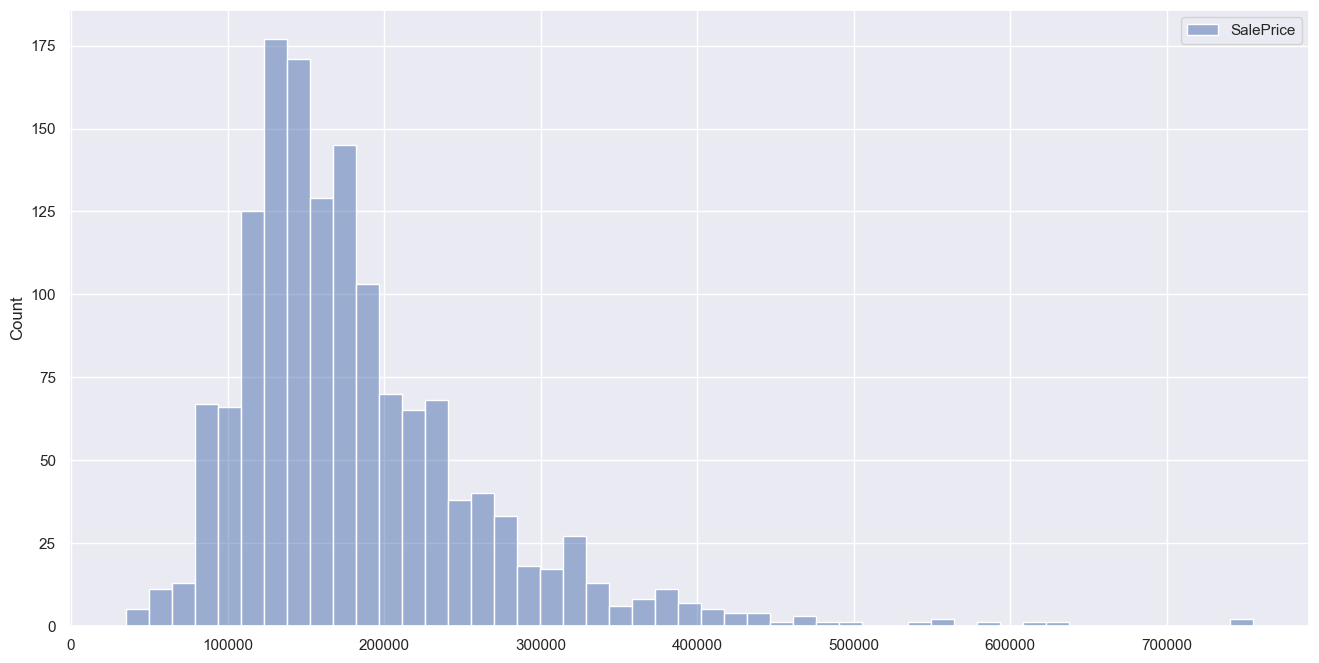

In [420]:
f = plt.figure(figsize = (16,8))
sb.histplot(data = salePriceDF)

# KDE

<AxesSubplot:ylabel='Density'>

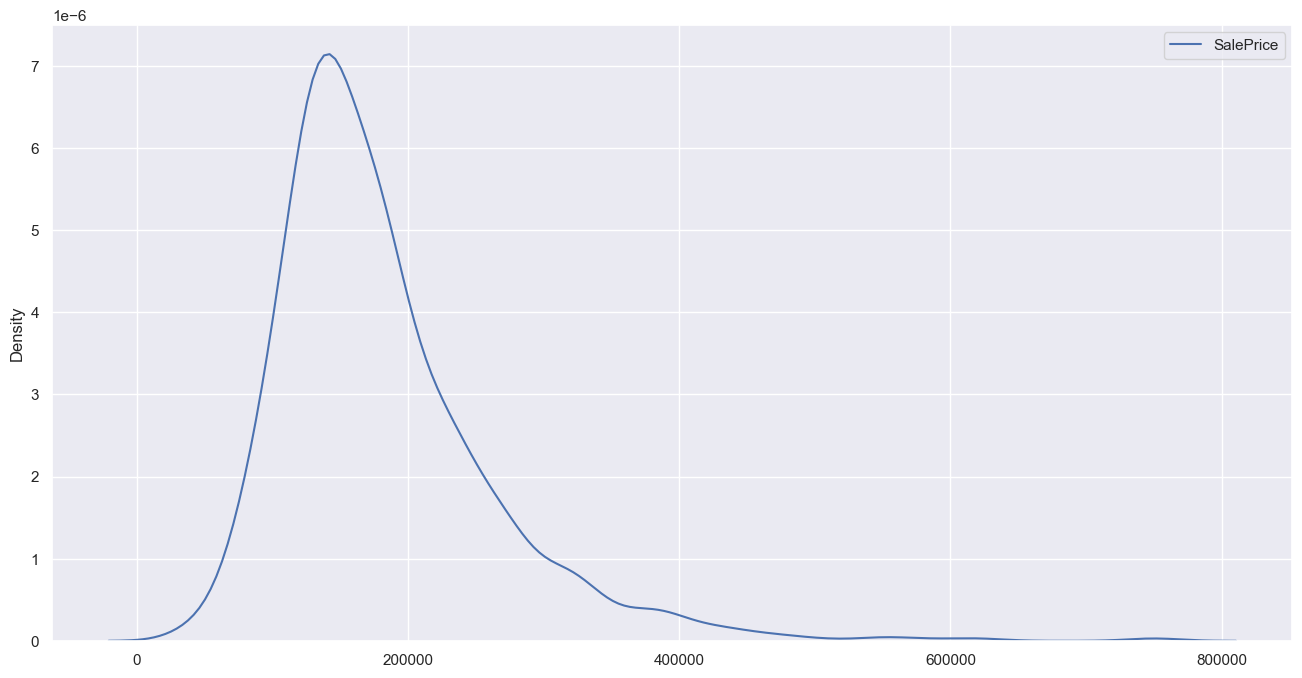

In [421]:
f = plt.figure(figsize = (16,8))
sb.kdeplot(data = salePriceDF)

# KDE + Histogram

<AxesSubplot:ylabel='Count'>

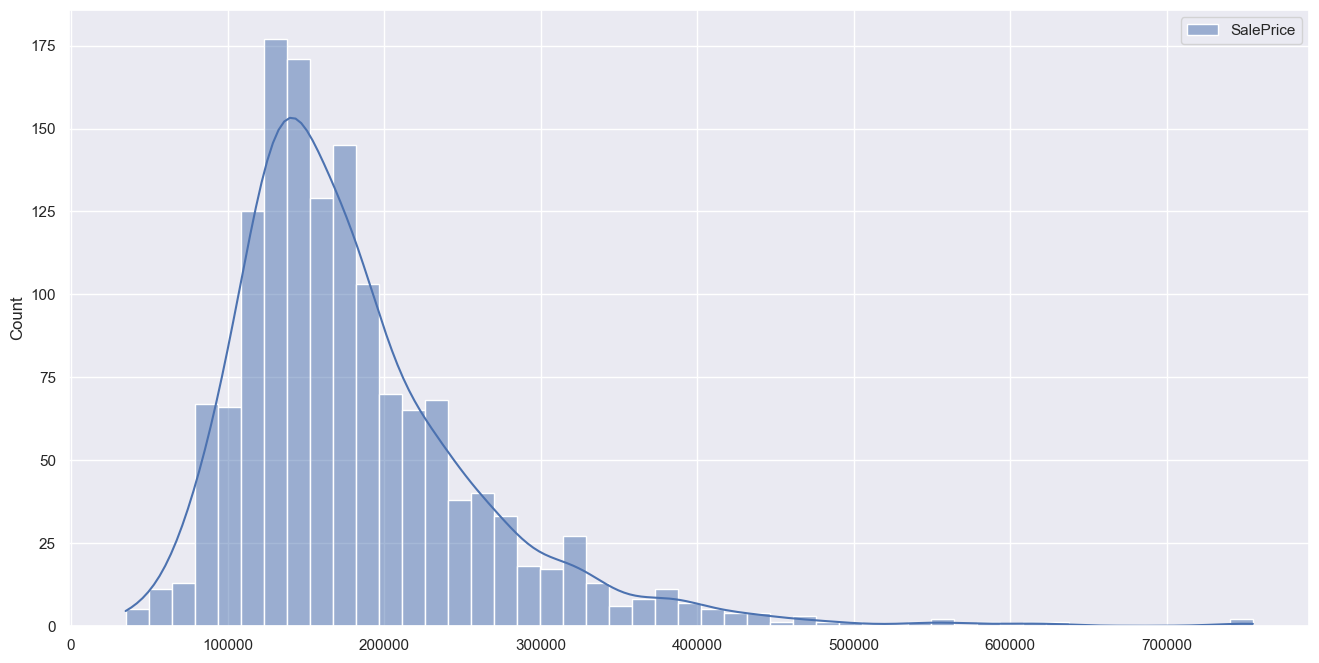

In [422]:
f = plt.figure(figsize = (16,8))
sb.histplot(data = salePriceDF, kde = True)

# Violin Plot

<AxesSubplot:>

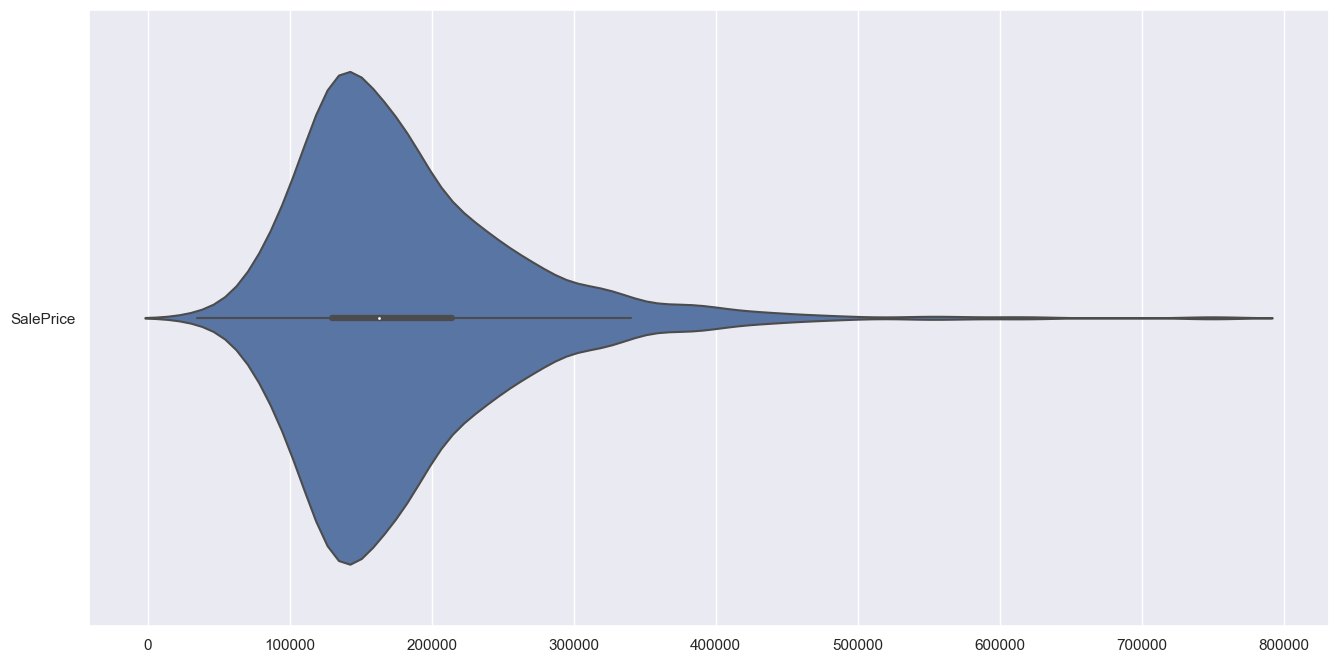

In [423]:
f = plt.figure(figsize = (16,8))
sb.violinplot(data = salePriceDF, orient = 'h')

c) Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame.

In [424]:
#Extract the sale price
lotAreaDF = pd.DataFrame(intDF['LotArea'])
#Describe sale price DF
lotAreaDF.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


d) Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.

# Box Plot

Interval: 4048.0       Left Whisker:1481.5       Right Whisker:17673.5


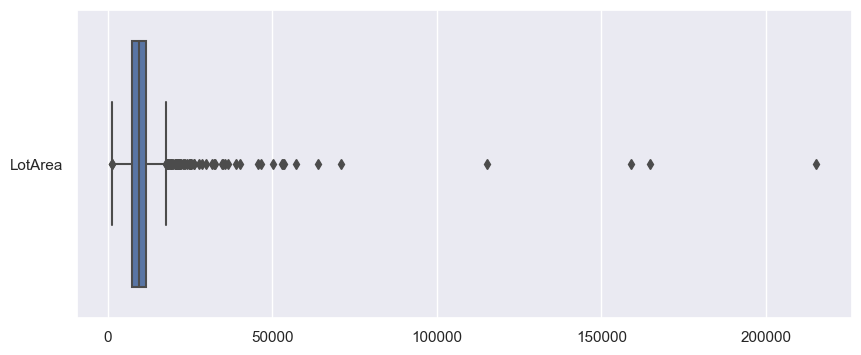

In [425]:
#Set figure
f = plt.figure(figsize = (10,4))
sb.boxplot(data = lotAreaDF, orient = 'h')

#Find bottom and top whiskers
lotAreaStats = lotAreaDF.describe();
lotAreaDiff = lotAreaStats.loc['75%'] - lotAreaStats.loc['25%']
#1.5 Quartile Gap
leftWhisker = lotAreaStats.loc['25%'] - (1.5 * lotAreaDiff)
rightWhisker = lotAreaStats.loc['75%'] + (1.5 * lotAreaDiff)
print("Interval: {0}\
       Left Whisker:{1}\
       Right Whisker:{2}".format(lotAreaDiff.LotArea, leftWhisker.LotArea, rightWhisker.LotArea))

# Histogram

<AxesSubplot:ylabel='Count'>

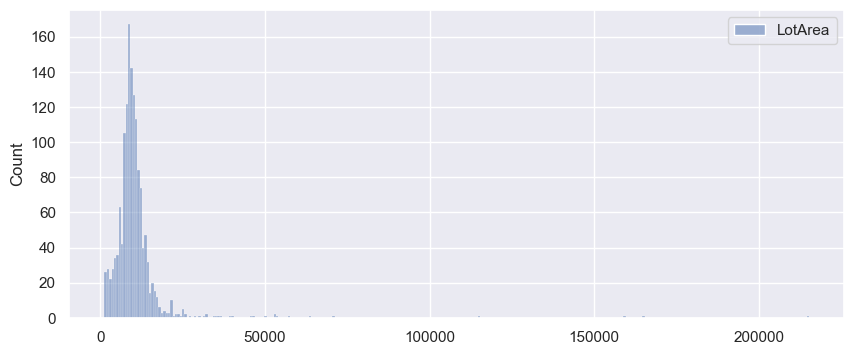

In [426]:
f = plt.figure(figsize= (10,4))
sb.histplot(data = lotAreaDF)

#Many outliers in data...

# KDE

<AxesSubplot:ylabel='Density'>

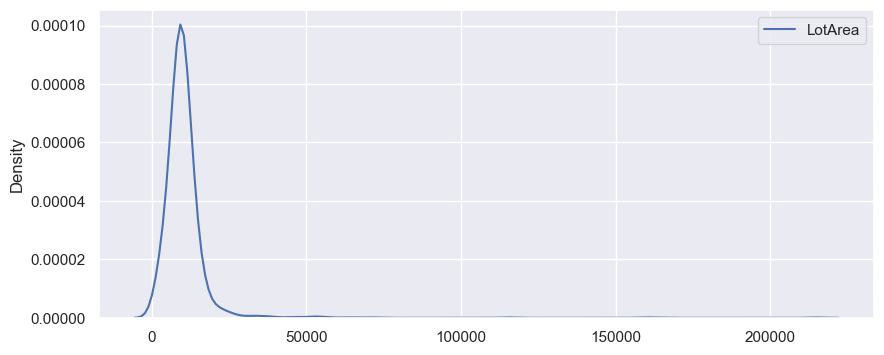

In [427]:
f = plt.figure(figsize= (10,4))
sb.kdeplot(data = lotAreaDF)

# KDE + Histogram

<AxesSubplot:ylabel='Count'>

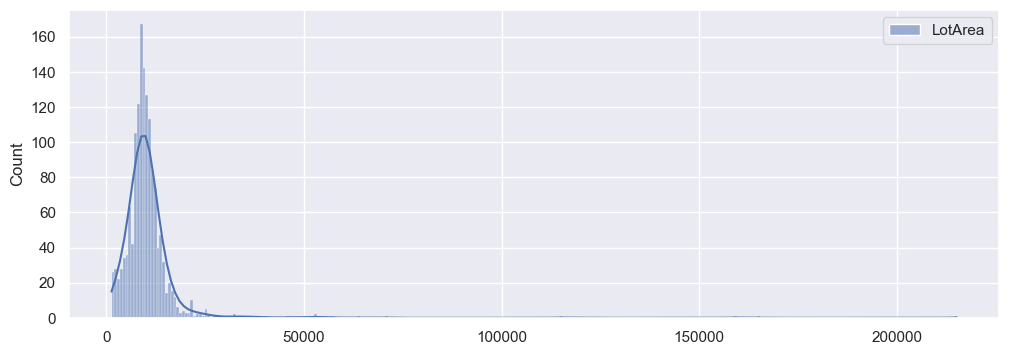

In [428]:
f = plt.figure(figsize= (12,4))
sb.histplot(data = lotAreaDF, kde = True)

# Violin Plot

<AxesSubplot:>

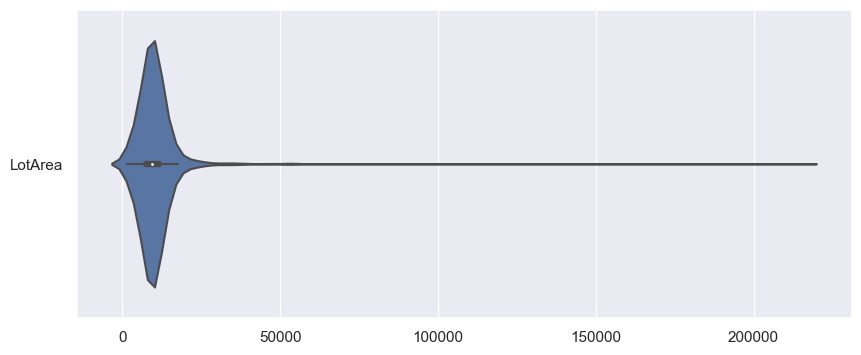

In [429]:
f = plt.figure(figsize= (10,4))
sb.violinplot(data = lotAreaDF, orient='h')

e) Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find the Correlation between the two.

---

We have lotAreaDF and salesPriceDF  
Prediction: Positive correlation, higher the lot area the more the sales price

# Visualizing in a Grid

<AxesSubplot:>

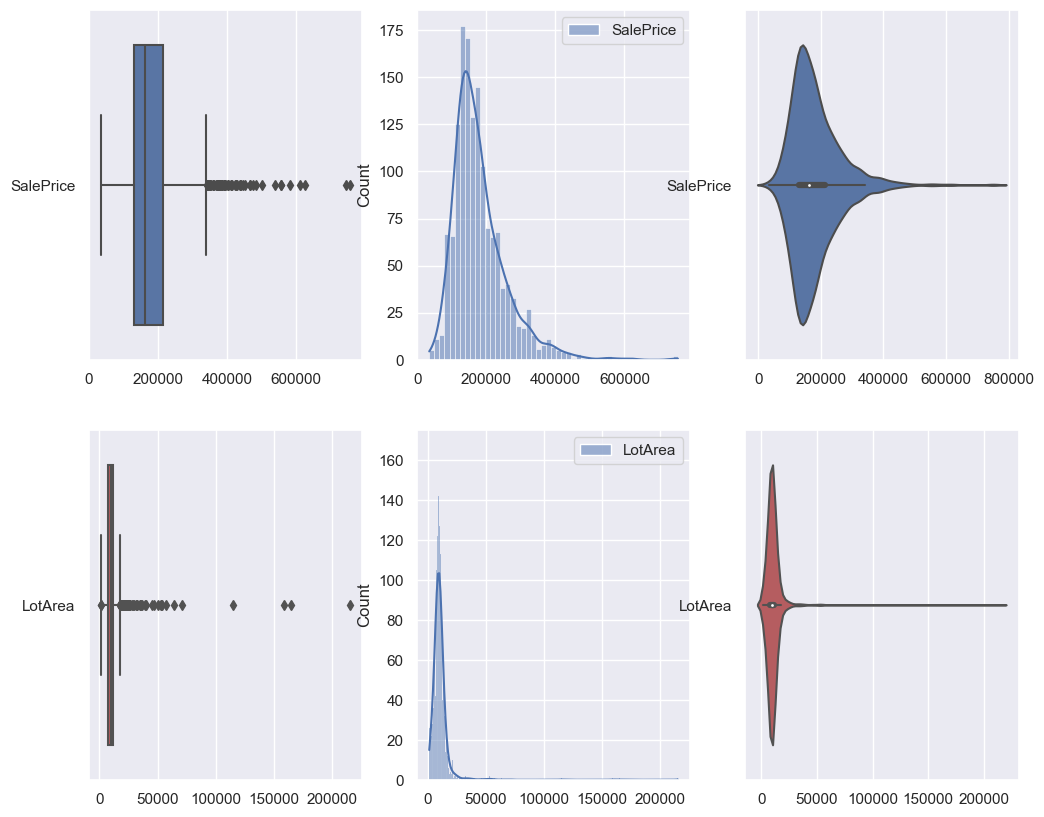

In [430]:
f, axes = plt.subplots(2,3, figsize = (12,10))

#Plot for sales price
sb.boxplot(data = salePriceDF, orient = 'h', ax =axes[0,0])
sb.histplot(data = salePriceDF, kde=True, ax =axes[0,1])
sb.violinplot(data = salePriceDF, orient = 'h', ax =axes[0,2])

#f = plt.figure(figsize = (10,4))
#Plot for lot area
sb.boxplot(data = lotAreaDF, orient = 'h', ax =axes[1,0], color = 'r')
sb.histplot(data = lotAreaDF, kde = True, ax =axes[1,1])
sb.violinplot(data = lotAreaDF, orient = 'h', ax =axes[1,2], color = 'r')

# Create Joint Plot DF

In [431]:
jointDF = pd.concat([salePriceDF,lotAreaDF], axis =1).reindex(salePriceDF.index)
jointDF

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


# Draw Plot

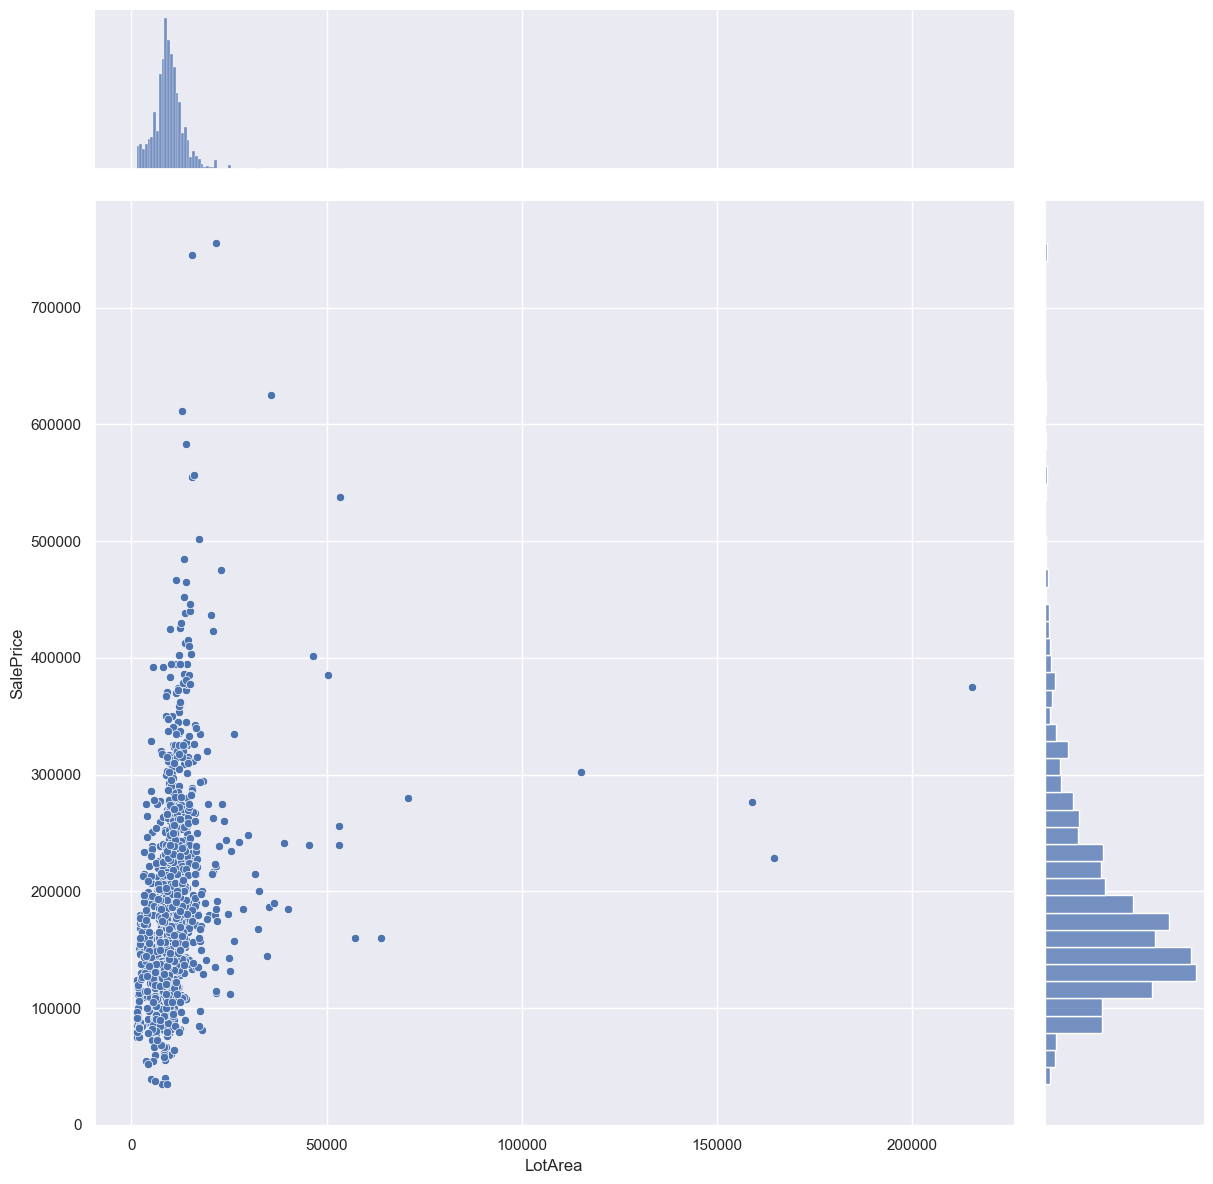

In [432]:
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

# Find Correlation

In [433]:
jointDF.corr()

#Not a very posotive correlation...

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


<AxesSubplot:>

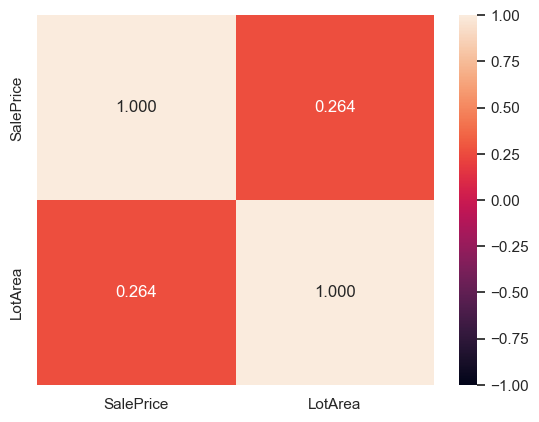

In [434]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

# Bonus Problem (Go finish during lab)

--- 

Create a new Pandas DataFrame consisting of all variables (columns) of type Integer (int64) or Float (float64).
Read the description for each variable carefully and try to identify the “actual” Numeric variables in the data.  

Drop non-Numeric variables from the DataFrame to have a clean DataFrame with only the Numeric variables.
Plot SalePrice vs each of the Numeric variables you identified to understand their correlation or dependence.

In [435]:
#See dtypes again
houseData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [436]:
df = houseData.select_dtypes(['int64', 'float64'])
df.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [437]:
#Drop previous categorical data
df = df.drop(["MSSubClass","OverallQual","OverallCond"], axis='columns')
#Then also drop NaN
floatIntDF = df.dropna()
floatIntDF

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1999,2000,0.0,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,85.0,13175,1978,1988,119.0,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,66.0,9042,1941,2006,0.0,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,68.0,9717,1950,1996,0.0,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


# Box Plot of all 35

<AxesSubplot:>

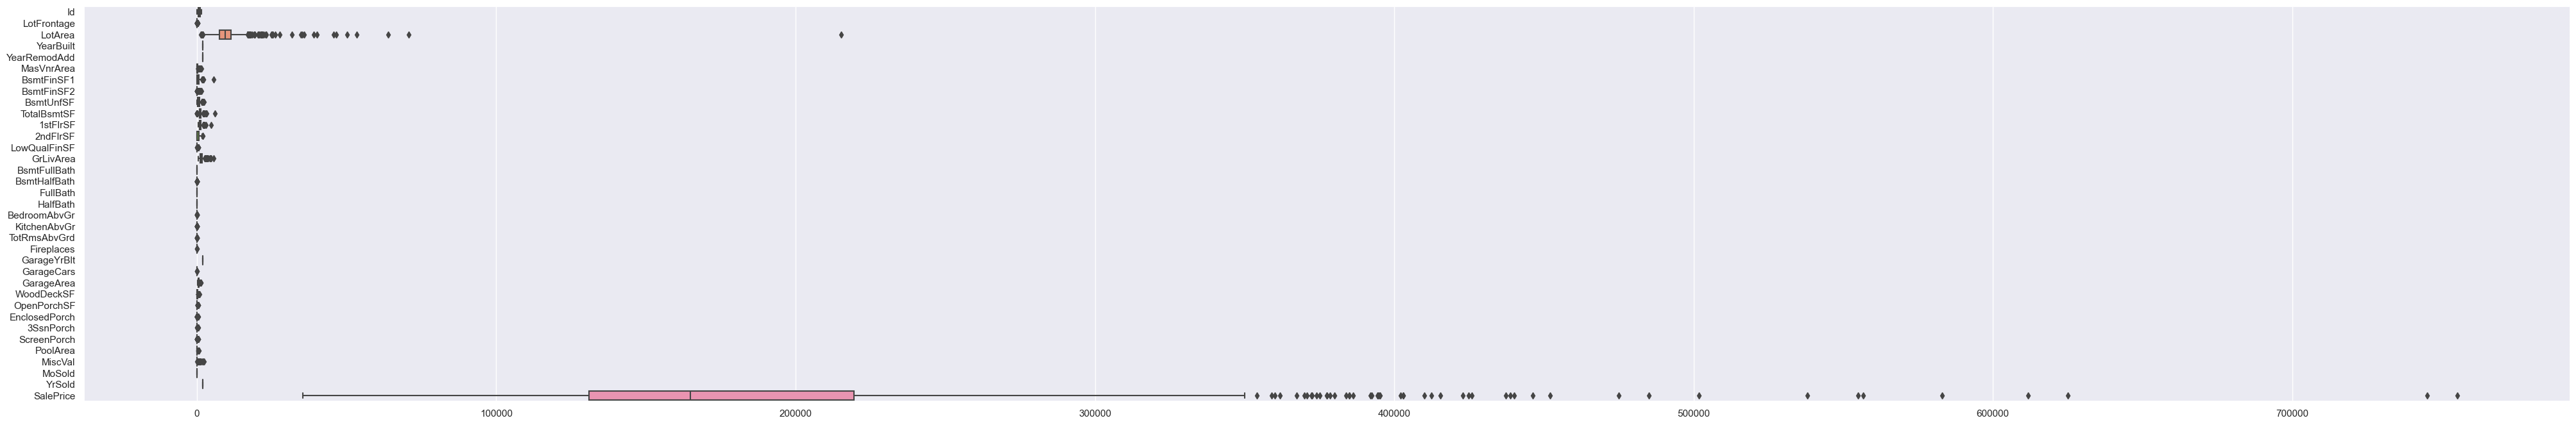

In [438]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(50, 8))
sb.boxplot(data = floatIntDF, orient = "h")